In [119]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import shapefile as shp
%matplotlib inline


plt.style.use('ggplot')

In [120]:
public_trans_full16 = pd.read_csv('../data/2016_metrics.csv')
public_trans_full16.head(5)

,Name,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?,Unnamed: 39,Unnamed: 40,Unnamed: 41,1,Unnamed: 43,Unnamed: 44
0,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",HR,...,NaN,"347,091,534",NaN,No,NaN,NaN,NaN,Hide questionable data tags,NaN,NaN
1,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",MB,...,NaN,"86,863,364",NaN,No,NaN,NaN,NaN,Show questionable data tags,NaN,NaN
2,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",DR,...,NaN,"48,814,480",NaN,No,NaN,2.0,NaN,1,NaN,2.0
3,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",CB,...,NaN,"9,214,967",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
4,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",RB,...,NaN,"2,988,560",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
public_trans_full16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 45 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Name                                                                     3685 non-null   object 
 1   City                                                                     3685 non-null   object 
 2   State                                                                    3685 non-null   object 
 3   Legacy NTD ID                                                            3470 non-null   object 
 4   NTD ID                                                                   3685 non-null   object 
 5   Organization Type                                                        3685 non-null   object 
 6   Reporter Type                                                           

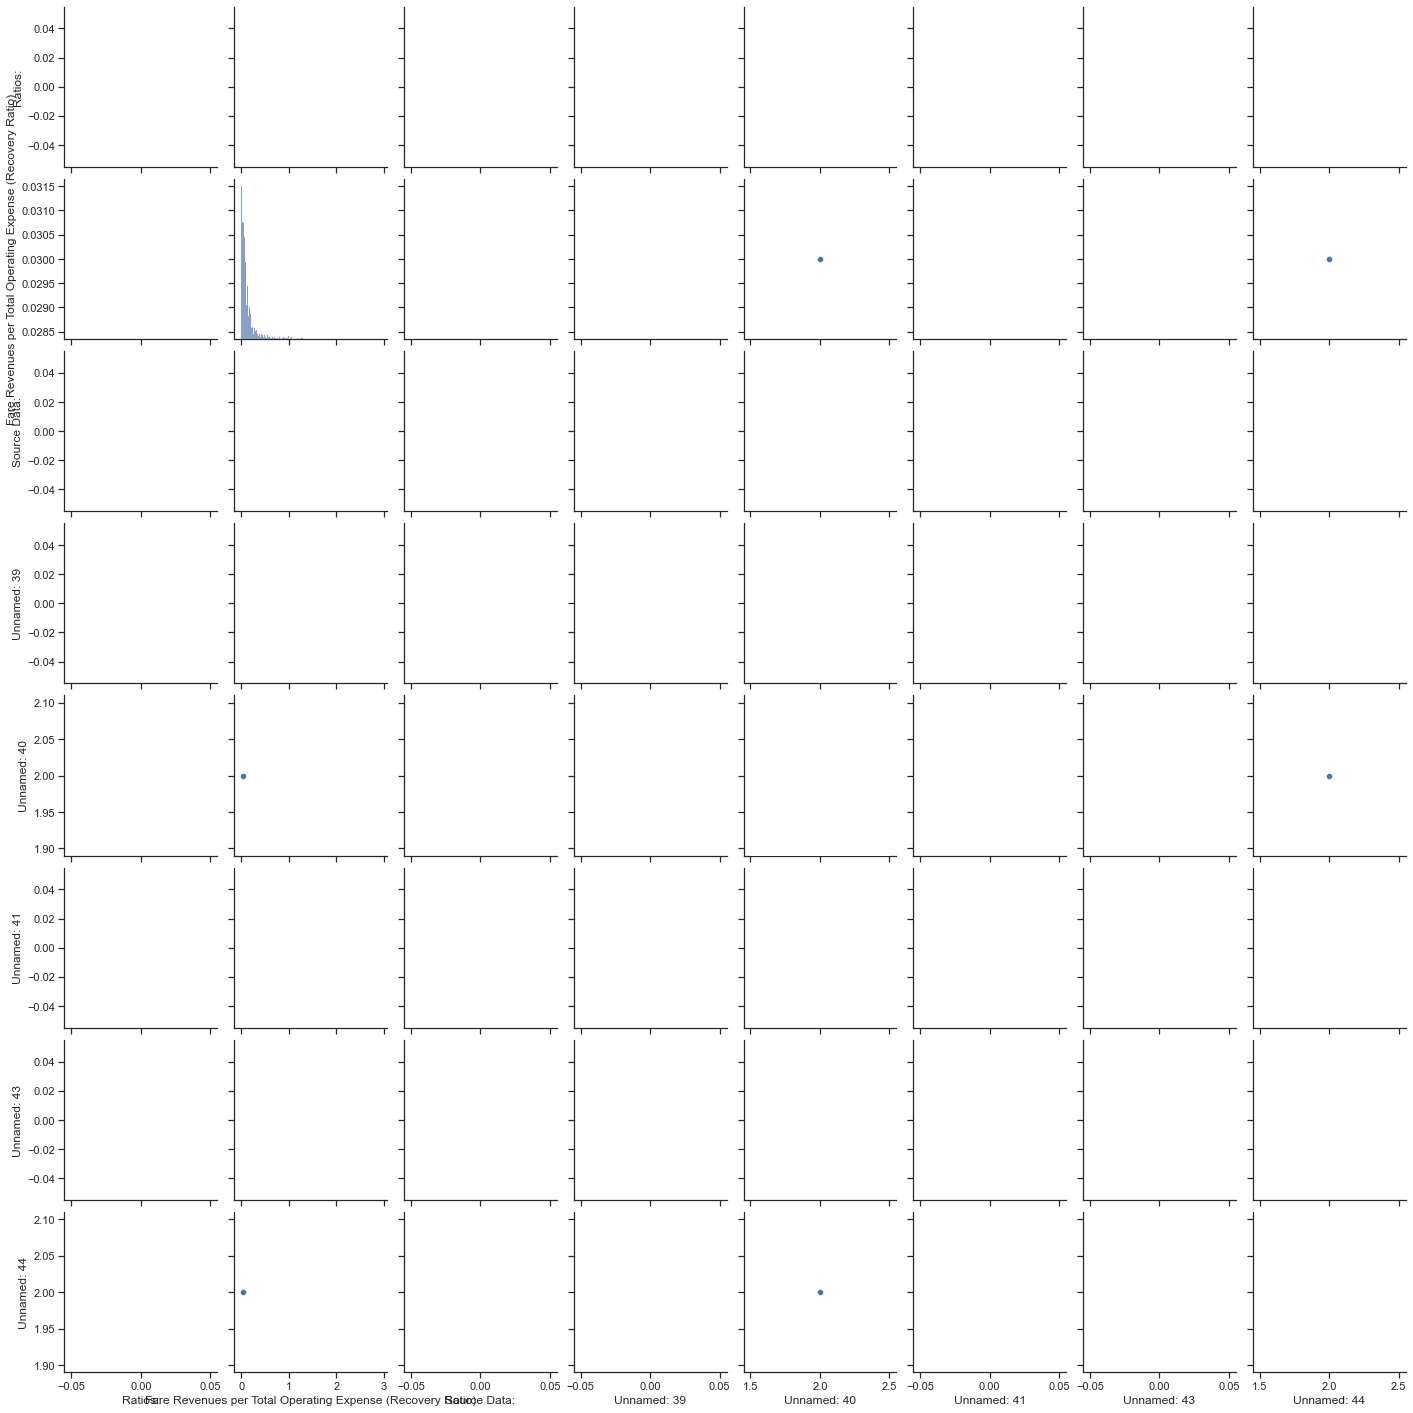

In [122]:
sns.set_theme(style='ticks')
sns.pairplot(public_trans_full16)

In [123]:
# # public_trans16_modes['Mode'] = public_trans16['Mode'].groupby(by=['RB', 'CB', 'MB', 'CR' ])
# public_trans16_mode = public_trans16.groupby(['RB'])

filtered_test_df = public_trans_full16[public_trans_full16['Mode'].isin(['CR', 'CB', 'RB', 'MB'])]
filtered_test_df.head(5)

,Name,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?,Unnamed: 39,Unnamed: 40,Unnamed: 41,1,Unnamed: 43,Unnamed: 44
1,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",MB,...,NaN,"86,863,364",NaN,No,NaN,NaN,NaN,Show questionable data tags,NaN,NaN
3,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",CB,...,NaN,"9,214,967",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
4,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",RB,...,NaN,"2,988,560",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
5,New Jersey Transit Corporation,Newark,NJ,2080,20080,Other Publicly-Owned or Privately Chartered Co...,Full Reporter,"18,351,295","4,056",MB,...,NaN,"72,451,012",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
6,New Jersey Transit Corporation,Newark,NJ,2080,20080,Other Publicly-Owned or Privately Chartered Co...,Full Reporter,"18,351,295","4,056",CR,...,NaN,"61,393,168",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
filtered_test_df = filtered_test_df.loc[filtered_test_df['State'] == 'NY']
filtered_test_df.head(5)

,Name,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?,Unnamed: 39,Unnamed: 40,Unnamed: 41,1,Unnamed: 43,Unnamed: 44
1,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",MB,...,NaN,"86,863,364",NaN,No,NaN,NaN,NaN,Show questionable data tags,NaN,NaN
3,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",CB,...,NaN,"9,214,967",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
4,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",RB,...,NaN,"2,988,560",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
89,"Metro-North Commuter Railroad Company, dba: MT...",New York,NY,2078,20078,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","1,175",CR,...,NaN,"69,580,238",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
90,"Metro-North Commuter Railroad Company, dba: MT...",New York,NY,2078,20078,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","1,175",MB,...,NaN,"157,793",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
city_county =pd.read_csv('../data/ny_city_county.csv')

In [126]:
public_trans_2016_with_county = filtered_test_df.merge(
    city_county,
    how='left',
    left_on='City',
    right_on='City'
)

<function matplotlib.pyplot.show(close=None, block=None)>

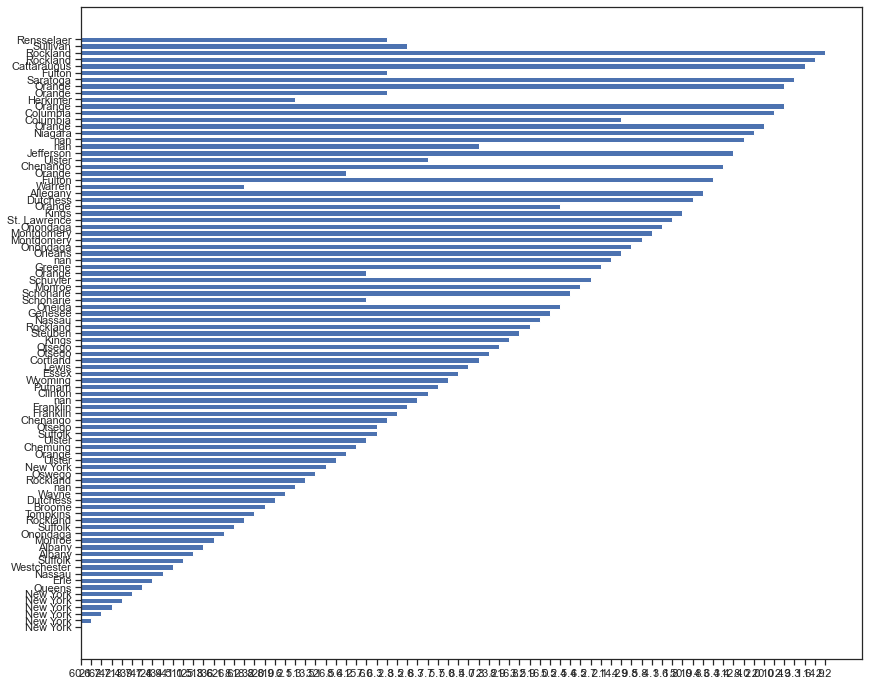

In [127]:
fig, ax = plt.subplots(facecolor='white', figsize=(14,12))
x = public_trans_2016_with_county['County']
y = public_trans_2016_with_county['Passengers per Hour']
y_pos = np.arange(len(x))

plt.barh(y_pos, y)
plt.yticks(y_pos, x)

plt.show

In [128]:
public_trans_2016_with_county['MB'] = public_trans_2016_with_county['Mode'] == 'MB'
public_trans_2016_with_county['CB'] = public_trans_2016_with_county['Mode'] == 'CB'
public_trans_2016_with_county['RB'] = public_trans_2016_with_county['Mode'] == 'RB'
public_trans_2016_with_county['CR'] = public_trans_2016_with_county['Mode'] == 'CR'

In [129]:
# public_trans_2016_with_county = public_trans_2016_with_county.drop('Unlinked Passenger Trips Questionable', axis=1)
public_trans_2016_with_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 88
Data columns (total 50 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Name                                                                     89 non-null     object 
 1   City                                                                     89 non-null     object 
 2   State                                                                    89 non-null     object 
 3   Legacy NTD ID                                                            86 non-null     object 
 4   NTD ID                                                                   89 non-null     object 
 5   Organization Type                                                        89 non-null     object 
 6   Reporter Type                                                            89 

In [130]:
public_trans_2016_with_county.head(3)

,Name,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Unnamed: 40,Unnamed: 41,1,Unnamed: 43,Unnamed: 44,County,MB,CB,RB,CR
0,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",MB,...,NaN,NaN,Show questionable data tags,NaN,NaN,New York,True,False,False,False
1,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",CB,...,NaN,NaN,NaN,NaN,NaN,New York,False,True,False,False
2,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",RB,...,NaN,NaN,NaN,NaN,NaN,New York,False,False,True,False


In [131]:
# Turn True False in below columns to 0 or 1
public_trans_2016_with_county['CR'] = [int(item) for item in public_trans_2016_with_county['CR']]
public_trans_2016_with_county['RB'] = [int(item) for item in public_trans_2016_with_county['RB']]
public_trans_2016_with_county['CB'] = [int(item) for item in public_trans_2016_with_county['CB']]
public_trans_2016_with_county['MB'] = [int(item) for item in public_trans_2016_with_county['MB']]

In [132]:
county_trans = public_trans_2016_with_county.groupby(
    'County', as_index=False)[['CR', 'RB', 'CB', 'MB']].sum()
county_trans['Total'] = county_trans['CR'] + county_trans['CB'] + county_trans['RB'] +county_trans['MB']
county_trans

,County,CR,RB,CB,MB,Total
0,Albany,0,0,1,1,2
1,Allegany,0,0,0,1,1
2,Broome,0,0,0,1,1
3,Cattaraugus,0,0,0,1,1
4,Chemung,0,0,0,1,1
5,Chenango,0,0,0,2,2
6,Clinton,0,0,0,1,1
7,Columbia,0,0,1,1,2
8,Cortland,0,0,0,1,1
9,Dutchess,0,0,0,2,2


In [133]:

import plotly.express as px
import plotly.graph_objects as go
import json
import requests
# Reading in geojson for graphing and county numeric codes
# ny_counties_json = pd.read_json('new.geojson')

with open('new.geojson') as file:
    ny_geojson = json.load(file)

ny_counties_fips_codes_csv = pd.read_csv('../data/ny_counties_fips_codes.csv')
ny_counties_fips_codes_csv.columns = ny_counties_fips_codes_csv.columns.str.replace(' ','_')
ny_counties_fips_codes_csv.head(2)

,County_Name,State_FIPS,County_Code,County_FIPS,ZIP_Code,File_Date
0,Albany,36,1,36001,12007,7/25/2007
1,Allegany,36,3,36003,14024,7/25/2007


In [134]:
ny_counties_fips_codes_csv['County_FIPS'] = ny_counties_fips_codes_csv.County_FIPS.astype(str)

In [135]:
# Creating new column with the last three digits of they county code
ny_counties_fips_codes_csv['Three Digit County Code'] = ny_counties_fips_codes_csv['County_FIPS'].str[2:5]
ny_counties_fips_codes_csv.head(5)

,County_Name,State_FIPS,County_Code,County_FIPS,ZIP_Code,File_Date,Three Digit County Code
0,Albany,36,1,36001,12007,7/25/2007,001
1,Allegany,36,3,36003,14024,7/25/2007,003
2,Bronx,36,5,36005,10451,7/25/2007,005
3,Broome,36,7,36007,13730,7/25/2007,007
4,Cattaraugus,36,9,36009,14009,7/25/2007,009


In [136]:
county_trans['Three Digit County Code'] = ny_counties_fips_codes_csv['Three Digit County Code'].astype(int)
county_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   County                   48 non-null     object
 1   CR                       48 non-null     int64 
 2   RB                       48 non-null     int64 
 3   CB                       48 non-null     int64 
 4   MB                       48 non-null     int64 
 5   Total                    48 non-null     int64 
 6   Three Digit County Code  48 non-null     int32 
dtypes: int32(1), int64(5), object(1)
memory usage: 2.6+ KB


In [137]:
ny_county_id_map = {}
for feature in ny_geojson['features']:
    feature['id'] = feature['properties']['county_fip']
    ny_county_id_map[feature['properties']['name']] = feature['id']

In [138]:
# New York Crime Rate
fig = px.choropleth(county_trans, geojson= ny_geojson, color='Total', locations='Three Digit County Code')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()